In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from pandas.io import wb
import numpy as np

Na podstawie [Pandas Remote Data](http://pandas.pydata.org/pandas-docs/stable/remote_data.html); zobacz też [inny wstęp](http://nbviewer.ipython.org/github/psychemedia/dataviz4development/blob/master/dataloaders/World%20Bank%20Demo.ipynb).

In [2]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
700,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
4683,GDPPCKD,"GDP per Capita, constant US$, millions"
6706,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
6708,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
6710,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [16]:
wb.search('fertility rate').iloc[:,:2]

,id,name
7758,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."
7798,SP.DYN.TFRT.IN,"Fertility rate, total (births per woman)"
7799,SP.DYN.TFRT.Q1,Total fertility rate (TFR) (births per woman)...
7800,SP.DYN.TFRT.Q2,Total fertility rate (TFR) (births per woman)...
7801,SP.DYN.TFRT.Q3,Total fertility rate (TFR) (births per woman)...
7802,SP.DYN.TFRT.Q4,Total fertility rate (TFR) (births per woman)...
7803,SP.DYN.TFRT.Q5,Total fertility rate (TFR) (births per woman)...
7806,SP.DYN.WFRT,Wanted fertility rate (births per woman)
7807,SP.DYN.WFRT.Q1,Total wanted fertility rate (births per woman)...
7808,SP.DYN.WFRT.Q2,Total wanted fertility rate (births per woman)...


In [72]:
wb.search('mortality').iloc[:,:2]

,id,name
687,5.51.01.03.mortal,Child mortality
5465,IN.POV.INF.MORTRATE,"Infant Mortality Rate (per 1,000)"
5466,IN.POV.INF.MORTRATE.UNDR5,"Under 5 Mortality Rate (Per 1,000)"
7118,SH.DYN.CHLD.FE,"Mortality rate, female child (per 1,000 female..."
7119,SH.DYN.CHLD.FE,"Mortality rate, female child (per 1,000 female..."
7120,SH.DYN.CHLD.MA,"Mortality rate, male child (per 1,000 male chi..."
7121,SH.DYN.CHLD.MA,"Mortality rate, male child (per 1,000 male chi..."
7122,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)"
7123,SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000)"
7124,SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000)"


In [94]:
ind = ['NY.GDP.PCAP.KD', 'SP.DYN.TFRT.IN', 'SH.DYN.NMRT']
dat = wb.download(indicator=ind, country='all', start=2011, end=2011).groupby(level=0).mean()
dat.columns = ['gdp', 'fertility rate', 'infant mortality']
print(dat.tail())

                            gdp  fertility rate  infant mortality
country                                                          
West Bank and Gaza  1408.291836         4.14400              12.8
World               7758.427905         2.47573              21.1
Yemen, Rep.          728.326235         4.34800              25.9
Zambia               986.452717         5.77300              30.3
Zimbabwe             435.794144         3.64300              39.1


In [95]:
dat['log10_gdp'] = np.log10(dat['gdp'])

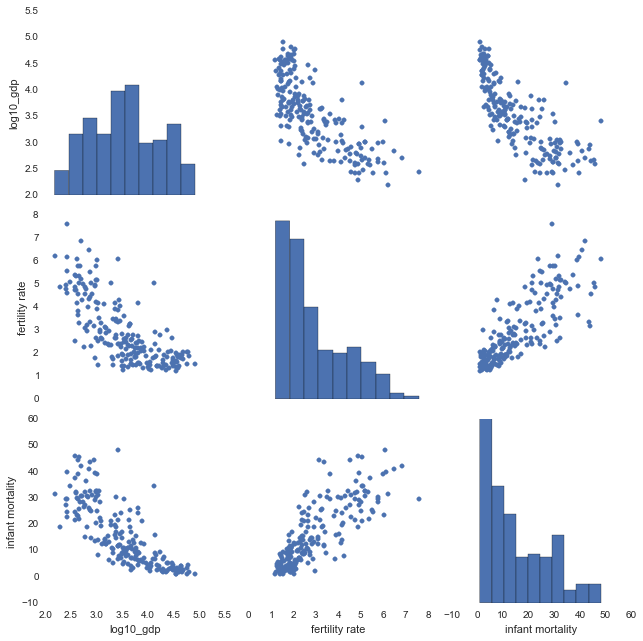

In [96]:
sns.pairplot(dat[['log10_gdp', 'fertility rate', 'infant mortality']].dropna());